## BMI 데이터를 이용해 비만 정도를 판단하는 앙상블 모델을 구현해보자.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # 데이터를 랜덤하게 분리시켜주는 클래스
from sklearn.tree import DecisionTreeClassifier # 결정 트리 분류 모델 클래스
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 앙상블 모델
from sklearn.neighbors import KNeighborsClassifier # KNN 단일 모델

In [34]:
# 데이터 로드
bmi_data = pd.read_csv('data/bmi_500.csv')

# 문제, 정답 분리
x = bmi_data.iloc[:,1:3] # 문제 데이터는 키와 몸무게
y = bmi_data.iloc[:,-1] # 정답 데이터는 bmi

# 학습, 평가 분리
X_train = x.iloc[:350, :]
y_train = y.iloc[:350] # y는 series라 행번호만 인덱스하면 됨.
X_test = x.iloc[350:, :]
y_test = y.iloc[350:] # y는 series라 행번호만 인덱스하면 됨.

# KNN모델 객체
# n_neighbors: k값(이웃의 수) 설정
# 이웃 수는 학습용 데이터 크기(350)의 루트값으로 시작하고 테스트 진행

# 모델 로드
knn_model = KNeighborsClassifier(n_neighbors=10)
# 하이퍼파라미터는 실험과 테스트를 통해 현재 데이터에 적절한 값을 사람이 찾아내야함;;;;

# 모델 학습
knn_model.fit(X_train, y_train)

# 모델 평가
# score: 예측 및 정확도 평가를 한번에 실행(predict, accuracy_score 같이 한 거)
knn_model.score(X_test, y_test)

0.94

### 랜덤 포레스트 앙상블 모델 적용

In [37]:
forest_model = RandomForestClassifier(n_estimators=100, # RF내 트리모델 개수
                                      max_features=5, # 샘플 데이터의 특성 개수
                                      max_depth=5, # 트리의 최대 깊이
                                      random_state=11) # 랜덤 시드 값
forest_model

RandomForestClassifier(max_depth=5, max_features=5, random_state=11)

In [39]:
forest_model.fit(X_train, y_train) # X는 다차원의 데이터프레임이라 대문자, y는 단일한 series라 소문자

RandomForestClassifier(max_depth=5, max_features=5, random_state=11)

In [41]:
forest_model.score(X_train, y_train)

0.9457142857142857

In [43]:
forest_model.score(X_test, y_test)

0.8466666666666667

In [47]:
train_list, test_list = [], []
for i in range(1,11):
    forest_model = RandomForestClassifier(n_estimators=100,
                                          max_features=5,
                                          max_depth=i,
                                          random_state=11
                                         )
    forest_model.fit(X_train, y_train)
    train_score = forest_model.score(X_train, y_train)
    train_list.append(train_score)

    test_score = forest_model.score(X_test, y_test)
    test_list.append(test_score)

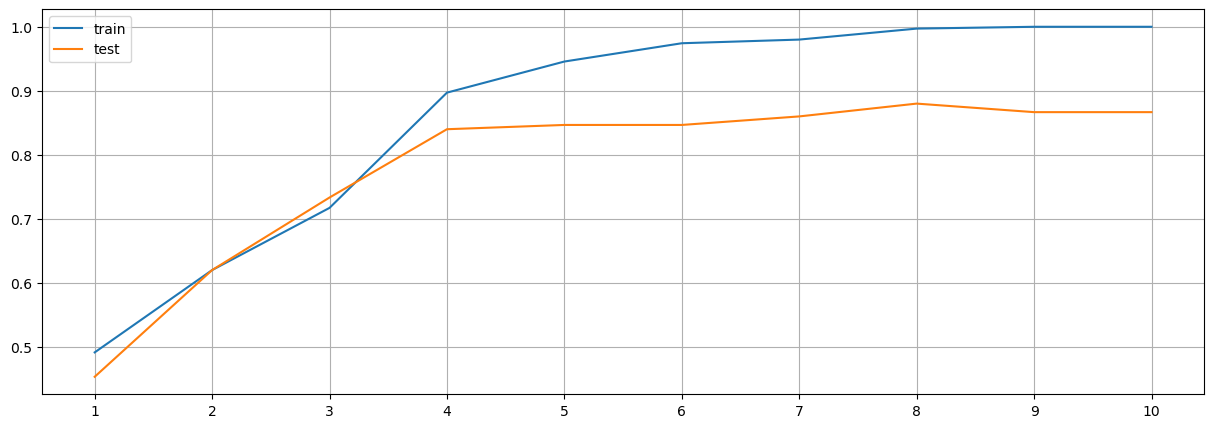

In [51]:
plt.figure(figsize=(15,5))
# max_depth가 1부터 시작해서 x축 표기값을 1부터 출력되게 설정
plt.plot(range(1,11), train_list, label = 'train')
plt.plot(range(1,11), test_list, label = 'test')
plt.xticks(range(1,11))
plt.legend()
plt.grid()

## XG 부스팅 앙상블 모델 적용
- xgboost는 sklearn에서 지원을 안 해줌. 외부 라이브러리 설치 필요
- 정답 데이터를 자동으로 수치화 시켜주지 않음...sklearn에서 지원해주는 모델은 정답 데이터를 자동으로 수치화 시켜줌.

In [55]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 660.6 kB/s eta 0:03:47
   ---------------------------------------- 0.2/150.0 MB 2.5 MB/s eta 0:01:01
   ---------------------------------------- 0.7/150.0 MB 5.3 MB/s eta 0:00:29
   ---------------------------------------- 1.2/150.0 MB 6.7 MB/s eta 0:00:23
   ---------------------------------------- 1.9/150.0 MB 8.5 MB/s eta 0:00:18
    --------------------------------------- 2.5/150.0 MB 9.9 MB/s eta 0:00:15
    --------------------------------------- 3.1/150.0 MB 10.6 MB/s eta 0:00:14
   - -------------------------------------- 4.0/150.0 MB 12.2 MB/s eta 0:00:12
   - -------------------------------------- 4.8/150.0 MB 13.3 MB/s eta 0:00:11
   - -------------------------------------- 5.7/150.0 MB 13.5 MB/s eta 0:00:11
   - -------------------------------------- 6.6/150.0 MB 14.4 MB/s eta 0:00:10
   - -------------------------------------- 7.5/150.0 MB 15.0 MB

In [61]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [65]:
encoder = LabelEncoder()
# fit_transform: 데이터의 범위 학습 및 실제 변환까지 한번에 진행
y_train_encoded = encoder.fit_transform(y_train)

# y_test의 범위는 encoder가 학습하면 안 됨 -> 치팅의 위험
y_test_encoded = encoder.transform(y_test)

In [67]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [69]:
xg_model.score(X_train, y_train_encoded)

1.0

In [71]:
# 하이퍼파라미터를 손대지 않았음에도 랜덤포레스트에 비해 평가데이터 결과가 훨씬 좋은!
xg_model.score(X_test, y_test_encoded)

0.9

## 보팅 앙상블 모델 적용

In [75]:
from sklearn.ensemble import VotingClassifier

In [77]:
voting_model = VotingClassifier(estimators=[('knn', knn_model), # 모델명(임의로 지정), 모델 객체
                                            ('forest', forest_model),
                                            ('xg',xg_model)],
                                voting = 'soft') # 소프트 보팅으로 설정
voting_model

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('forest',
                              RandomForestClassifier(max_depth=10,
                                                     max_features=5,
                                                     random_state=11)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            ev...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [79]:
voting_model.fit(X_train, y_train)
voting_model.score(X_train, y_train)

0.9971428571428571

In [81]:
voting_model.score(X_test, y_test)

0.8933333333333333

- train과 test 의 정확도 절대값이 높을수록 좋으나, 편차는 커질수록 안 좋아짐.
- 따라서 train과 test의 정확도 차이가 줄어들 수 있도록 데이터에 대한 가공을 신경쓰거나 모델 단에서의 하이퍼파라미터를 잘 튜닝하는 것이 성능을 높일 수 있는 방법

## 그리드 서치 적용
- 지정된 범위 내에서 최적의 하이퍼파라미터 값을 찾아주는 메커니즘

In [85]:
from sklearn.model_selection import GridSearchCV # CV: 교차검증

In [87]:
# 하이퍼파라미터 범위 지정
param_RF = {'n_estimators':range(50,200,50),
            'max_depth':range(1,10,1)}
grid_search_RF = GridSearchCV(RandomForestClassifier(), # 원하는 모델 넣기
                              param_RF, # 이 모델에 들어가는 하이퍼파라미터 넣기
                              cv = 5, # 교차 검증 폴드(세트) 개수 -> 랜덤으로 지정되어서 돌릴 때마다 차이가 조금씩 있음.
                              verbose=2) # verbose: 진행과정 보기 (0: 출력안함(디폴트), 1: 간단한 과정 출력, 2: 상세한 과정 출력)

# 그리드 서치 실행
grid_search_RF.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.0s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=1, n_estimators=150; total time=   0.2s
[CV] END ......................max_depth=1, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': range(50, 200, 50)},
             verbose=2)

In [89]:
print('the most adequqte parameter: ',grid_search_RF.best_params_)
print('the best score: ',grid_search_RF.best_score_)
print('the best model: ',grid_search_RF.best_estimator_) # 현재 grid_search_RF에 저장된 모델이 최고 성능 모델

the most adequqte parameter:  {'max_depth': 8, 'n_estimators': 50}
the best score:  0.8742857142857143
the best model:  RandomForestClassifier(max_depth=8, n_estimators=50)
